In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [2]:
from helpers import load_data

# load dataset
x, y = load_data()
print(x.shape, y.shape)

(50,) (50,)


In [3]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)



In [4]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree: TODO
    # ***************************************************
    x_poly = build_poly(x, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    # test
    te_indices = k_indices[k]
    tr_indices = k_indices[[i for i in range(len(k_indices)) if i != k]]
    tr_indices = tr_indices.reshape(-1)
    x_train = x_poly[tr_indices]
    x_test = x_poly[te_indices]

    
    # x_train = np.delete(x_poly, k_indices[k], axis=0)
    # x_test = x_poly[k_indices[k]]
    print(x_train.shape, x_test.shape)


    # y_train = np.delete(y, k_indices[k])
    # y_test = y[k_indices[k]]

    y_train = y[tr_indices]
    y_test = y[te_indices]

    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    weights = ridge_regression(y_train, x_train, lambda_)

    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    loss_tr = compute_mse(y_train, x_train, weights)
    loss_te = compute_mse(y_test, x_test, weights)
    return loss_tr, loss_te

(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) (12, 8)
(36, 8) 

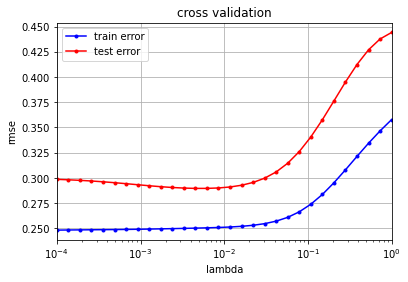

In [5]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # ***************************************************
    for lambda_ in lambdas:
      rmse_tr_fold = []
      rmse_te_fold = []
      for k in range(k_fold):
        loss_tr, loss_te = cross_validation(y, x, k_indices, k, lambda_, degree)
        rmse_tr_fold.append(np.sqrt(loss_tr*2))
        rmse_te_fold.append(np.sqrt(loss_te*2))
      
      rmse_tr.append(np.mean(rmse_tr_fold))
      rmse_te.append(np.mean(rmse_te_fold))
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

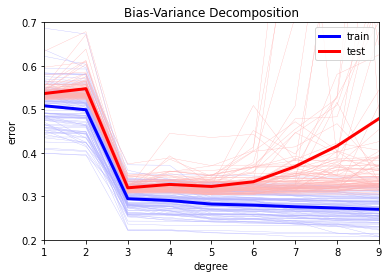

In [12]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        x_train, x_test, y_train, y_test = split_data(x, y, ratio_train, seed)
        # ***************************************************
        # INSERT YOUR CODE HERE
        for index_degree, degree in enumerate(degrees):
          x_train_poly = build_poly(x_train, degree)
          x_test_poly = build_poly(x_test, degree)
          weight = least_squares(y_train, x_train_poly)

          rmse_tr[index_seed][index_degree] = np.sqrt(2*compute_mse(y_train, x_train_poly, weight))
          rmse_te[index_seed][index_degree] = np.sqrt(2*compute_mse(y_test, x_test_poly, weight))


    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()